# Sign Language Translation Project

In [ ]:
# installing libraries, dependecies and setup tools 

In [1]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion - bgr to rgb
    image.flags.writeable = False 
    results = model.process(image) # detecting the landmarks
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion - rgb to bgr
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks) #face
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #body
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #left hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #right hand
    return image

In [5]:
def draw_styled_landmark(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, 
            mp.solutions.face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic :
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic) # used the function above to detect landmarks
        print(results)
        
        draw_styled_landmark(image, results) # used the function above to draw landmarks on frame
    
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
landmark_names = {
    0: 'Nose',
    1: 'Left Eye Inner',
    2: 'Left Eye',
    3: 'Left Eye Outer',
    4: 'Right Eye Inner',
    5: 'Right Eye',
    6: 'Right Eye Outer',
    7: 'Left Ear',
    8: 'Right Ear',
    9: 'Mouth Left',
    10: 'Mouth Right',
    11: 'Left Shoulder',
    12: 'Right Shoulder',
    13: 'Left Elbow',
    14: 'Right Elbow',
    15: 'Left Wrist',
    16: 'Right Wrist',
    17: 'Left Pinky',
    18: 'Right Pinky',
    19: 'Left Index',
    20: 'Right Index',
    21: 'Left Thumb',
    22: 'Right Thumb',
    23: 'Left Hip',
    24: 'Right Hip',
    25: 'Left Knee',
    26: 'Right Knee',
    27: 'Left Ankle',
    28: 'Right Ankle',
    29: 'Left Heel',
    30: 'Right Heel',
    31: 'Left Foot Index',
    32: 'Right Foot Index'
}

pose_connections = mp.solutions.holistic.POSE_CONNECTIONS

pose_connections_list = list(pose_connections)

for connection in pose_connections_list:
    start_idx, end_idx = connection
    start_name = landmark_names.get(start_idx, f"Unknown({start_idx})")
    end_name = landmark_names.get(end_idx, f"Unknown({end_idx})")
    print(f"{start_name} to {end_name}")

Left Wrist to Left Thumb
Right Wrist to Right Index
Right Pinky to Right Index
Left Eye Outer to Left Ear
Right Elbow to Right Wrist
Left Hip to Left Knee
Right Ankle to Right Heel
Left Shoulder to Left Hip
Left Ankle to Left Foot Index
Right Eye Outer to Right Ear
Left Wrist to Left Pinky
Right Hip to Right Knee
Right Wrist to Right Thumb
Right Eye Inner to Right Eye
Right Eye to Right Eye Outer
Left Heel to Left Foot Index
Right Shoulder to Right Hip
Left Hip to Right Hip
Nose to Left Eye Inner
Mouth Left to Mouth Right
Left Eye Inner to Left Eye
Nose to Right Eye Inner
Left Shoulder to Left Elbow
Right Heel to Right Foot Index
Right Ankle to Right Foot Index
Left Wrist to Left Index
Right Wrist to Right Pinky
Left Knee to Left Ankle
Right Knee to Right Ankle
Right Shoulder to Right Elbow
Left Pinky to Left Index
Left Eye to Left Eye Outer
Left Shoulder to Right Shoulder
Left Ankle to Left Heel
Left Elbow to Left Wrist


In [8]:
if results.left_hand_landmarks is not None:
    landmarks = results.left_hand_landmarks.landmark
    print(len(landmarks))
else:
    print("No hand landmarks detected.")

21


In [9]:
draw_landmarks(frame, results)

array([[[140, 143,  97],
        [143, 145, 102],
        [146, 144, 110],
        ...,
        [144, 159,  82],
        [142, 158,  74],
        [141, 157,  70]],

       [[140, 144,  98],
        [142, 145, 103],
        [146, 145, 111],
        ...,
        [140, 155,  81],
        [140, 156,  76],
        [139, 156,  73]],

       [[142, 147, 102],
        [143, 147, 106],
        [145, 145, 111],
        ...,
        [137, 151,  83],
        [138, 153,  81],
        [140, 156,  81]],

       ...,

       [[116, 109,  67],
        [117, 108,  67],
        [116, 107,  67],
        ...,
        [ 49,  62,  76],
        [ 53,  64,  79],
        [ 56,  67,  82]],

       [[115, 106,  70],
        [116, 106,  70],
        [116, 106,  69],
        ...,
        [ 46,  68,  80],
        [ 46,  67,  81],
        [ 48,  69,  83]],

       [[115, 103,  71],
        [116, 105,  71],
        [117, 106,  72],
        ...,
        [ 44,  72,  82],
        [ 43,  70,  83],
        [ 42,  70,  84]]

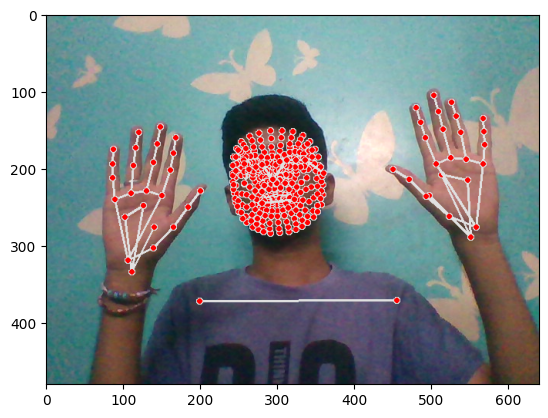

In [10]:
image_with_landmarks = draw_landmarks(frame, results)

image_rgb = cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB) #Converting to RGB  

plt.imshow(image_rgb) #display the drawn landmarks
plt.axis('on')  # Hide the axis
plt.show()

# extract keypoints

In [11]:
#pose

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) #flatten to create a big array

In [15]:
pose # the keypoints extracted, x y z and visibilty values

array([ 4.60502297e-01,  4.46807206e-01, -8.82841110e-01,  9.99992907e-01,
        4.87841278e-01,  3.95635813e-01, -8.29627812e-01,  9.99976695e-01,
        5.06460547e-01,  3.94137472e-01, -8.29253852e-01,  9.99980450e-01,
        5.25642753e-01,  3.93841416e-01, -8.28557193e-01,  9.99973893e-01,
        4.38177109e-01,  4.08296317e-01, -7.83903658e-01,  9.99971986e-01,
        4.25315768e-01,  4.14361775e-01, -7.83812404e-01,  9.99977946e-01,
        4.12462711e-01,  4.20220494e-01, -7.83769667e-01,  9.99971747e-01,
        5.62610626e-01,  4.29275215e-01, -5.16816139e-01,  9.99983132e-01,
        4.02120650e-01,  4.57453579e-01, -2.94328362e-01,  9.99977469e-01,
        5.04611909e-01,  5.00953734e-01, -7.74575830e-01,  9.99979556e-01,
        4.38660920e-01,  5.12189806e-01, -7.12716699e-01,  9.99967575e-01,
        7.12215006e-01,  7.74678588e-01, -3.39443058e-01,  9.99558568e-01,
        3.12370509e-01,  7.76156783e-01, -1.35079712e-01,  9.99173641e-01,
        9.59292233e-01,  

In [16]:
pose.shape

(132,)

In [17]:
#left hand

In [18]:
lh = np.array([[res.x, res.y, res.z] 
for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) #error handling for when the hand isnt in the frame

In [19]:
lh

array([ 8.73280227e-01,  5.76869547e-01,  3.42860346e-07,  8.18380058e-01,
        5.47776341e-01, -1.98023915e-02,  7.70859480e-01,  4.93627191e-01,
       -2.55976301e-02,  7.36566842e-01,  4.46315318e-01, -3.00685782e-02,
        7.04031289e-01,  4.20557648e-01, -3.32155116e-02,  7.90780187e-01,
        4.04357523e-01, -5.34052320e-04,  7.70202458e-01,  3.34378600e-01,
       -1.04391463e-02,  7.59742916e-01,  2.92519718e-01, -2.12614778e-02,
        7.51086771e-01,  2.53624976e-01, -3.01483423e-02,  8.21296036e-01,
        3.89350325e-01, -1.41081924e-03,  8.04919362e-01,  3.12173188e-01,
       -8.49966798e-03,  7.95403540e-01,  2.63302118e-01, -1.87157430e-02,
        7.85960019e-01,  2.20437765e-01, -2.70784851e-02,  8.53086293e-01,
        3.91671628e-01, -6.38053287e-03,  8.41999590e-01,  3.20459783e-01,
       -1.61594544e-02,  8.32735896e-01,  2.76861429e-01, -2.44841520e-02,
        8.22256804e-01,  2.39047095e-01, -3.10079604e-02,  8.86992514e-01,
        4.05908704e-01, -

In [20]:
#right hand

In [21]:
rh = np.array([[res.x, res.y, res.z] 
for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
rh

array([ 1.66926444e-01,  6.65802240e-01,  3.45292307e-07,  2.17972726e-01,
        6.33214593e-01, -2.16043685e-02,  2.57837415e-01,  5.75755477e-01,
       -2.92767622e-02,  2.88445324e-01,  5.20977855e-01, -3.56092826e-02,
        3.12885195e-01,  4.77883846e-01, -4.18216959e-02,  2.34540865e-01,
        4.91034597e-01, -1.27178021e-02,  2.52058715e-01,  4.21289027e-01,
       -2.71761697e-02,  2.58705884e-01,  3.75876009e-01, -4.02715765e-02,
        2.63408124e-01,  3.34870428e-01, -5.00959791e-02,  2.04360962e-01,
        4.79025453e-01, -1.31259412e-02,  2.18152747e-01,  4.01831865e-01,
       -2.54042652e-02,  2.26166040e-01,  3.50496233e-01, -3.77606377e-02,
        2.32398629e-01,  3.04948181e-01, -4.72340137e-02,  1.72584906e-01,
        4.83758092e-01, -1.69076379e-02,  1.77559480e-01,  4.09059525e-01,
       -3.00946441e-02,  1.82295769e-01,  3.61342251e-01, -4.01282087e-02,
        1.87677681e-01,  3.19174230e-01, -4.72874120e-02,  1.39129594e-01,
        5.00395000e-01, -

In [23]:
# face

In [24]:
results.face_landmarks.landmark

[x: 0.46507158875465393
y: 0.48578912019729614
z: -0.030302323400974274
, x: 0.46103984117507935
y: 0.44891050457954407
z: -0.04263898730278015
, x: 0.4633760452270508
y: 0.4641086161136627
z: -0.02596028335392475
, x: 0.45308274030685425
y: 0.41668039560317993
z: -0.025995509698987007
, x: 0.46015214920043945
y: 0.4371695816516876
z: -0.043675150722265244
, x: 0.45964953303337097
y: 0.42376992106437683
z: -0.03841112554073334
, x: 0.4592934250831604
y: 0.3951168954372406
z: -0.010802466422319412
, x: 0.4069792628288269
y: 0.41045257449150085
z: 0.023523854091763496
, x: 0.4584428369998932
y: 0.373453825712204
z: -0.0010285499738529325
, x: 0.45760026574134827
y: 0.35958558320999146
z: 0.0003095512802246958
, x: 0.45548215508461
y: 0.3165730834007263
z: 0.019149065017700195
, x: 0.4655057489871979
y: 0.4910092055797577
z: -0.03000473976135254
, x: 0.4660417437553406
y: 0.4955469071865082
z: -0.027981087565422058
, x: 0.46649885177612305
y: 0.49780726432800293
z: -0.02500941790640354
, 

In [25]:
face = np.array([[res.x, res.y, res.z] 
for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [26]:
def extract_keypoints(results): #putting all the keypoints in one function
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] 
    for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] 
    for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] 
    for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh]) #combining the keypoints

In [27]:
result_test=extract_keypoints(results)[:-10] #showing the last 10 values

In [28]:
result_test

array([ 0.4605023 ,  0.44680721, -0.88284111, ..., -0.04728741,
        0.13912959,  0.500395  ])

In [29]:
np.save('0', result_test) #saving the numpy array named as 0.npy

In [30]:
np.load('0.npy') #loading again

array([ 0.4605023 ,  0.44680721, -0.88284111, ..., -0.04728741,
        0.13912959,  0.500395  ])

# folders

In [31]:
DATA_PATH = os.path.join('C:\\Users\\Asus\\Downloads\\B9ECED6F.ASUSPCAssistant_qmba6cd70vzyy!App\\Link_to_MyASUS\\additonal stuff\\MPData')
actions = np.array(['hello','thanks','home']) #made 3 folders
no_sequences = 100 #no. of videos collected
sequence_length = 10 #no. of frames in each video

In [32]:
actions = np.array(['hello','thanks','home'])

In [33]:
#hello
##0
##1
##99
#thanks 

#home

# collect keypoints and saving the dataset

# process data and create labels and features

In [34]:
from sklearn.model_selection import train_test_split #partition test and training data

In [35]:
from tensorflow.keras.utils import to_categorical 

In [36]:
label_map = {label:num for num, label in enumerate(actions)} #dictionary for our different actions 

In [37]:
print("Label map:", label_map)

Label map: {'hello': 0, 'thanks': 1, 'home': 2}


In [38]:
sequences, labels = [], [] #x and y data
for action in actions:
    for sequence in range(no_sequences):
        window = [] 
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res) #adding all the frames from hte video
        sequences.append(window)
        labels.append(label_map[action]) 

In [39]:
np.array(sequences).shape #

(300, 10, 1662)

In [40]:
np.array(labels).shape

(300,)

In [41]:
x = np.array(sequences) 

In [42]:
x

array([[[ 0.47939047,  0.66104805, -0.75146872, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47938704,  0.65527308, -0.76352316, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48342115,  0.65347672, -0.76260048, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.48716688,  0.64999068, -0.75894535, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48990297,  0.64985406, -0.72471803, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48988476,  0.65170723, -0.87746209, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.49923769,  0.65237325, -0.7554853 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.52134085,  0.64646238, -0.75605595, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.52753139,  0.64569128, -0.81457841, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.50943696,  0.29192284, -1.11837375, ...,  

In [43]:
y = to_categorical(labels).astype(int) #converted labels to binary flag

In [44]:
y #positions represting diff labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05) #dividing the data and asssigning variables

In [46]:
x_train.shape #training data

(285, 10, 1662)

In [47]:
y_train.shape

(285, 3)

In [48]:
y_test #testing data

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [49]:
x_test 

array([[[ 0.48185438,  0.62212139, -0.7405948 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47378358,  0.6225509 , -0.64735419, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47175479,  0.6224497 , -0.70248556, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.47104049,  0.6235649 , -0.55361354, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47197485,  0.62640661, -0.5954898 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47346243,  0.62931806, -0.46392614, ...,  0.45319256,
          0.10027462, -0.04529859]],

       [[ 0.48456946,  0.58254784, -0.81058931, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48507276,  0.58494985, -0.81012905, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48532468,  0.58476359, -0.86249524, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.48895097,  0.58030528, -0.89397603, ...,  

In [50]:
x_test.shape

(15, 10, 1662)

In [51]:
y_test.shape

(15, 3)

# build and train

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard  

In [66]:
log_dir = os.path.join(DATA_PATH, "Logs") #made a log directory in the MPData folder
tb_callback = TensorBoard(log_dir=log_dir)

In [70]:
model = Sequential() #using sequential api 
model.add(LSTM(64, input_shape=(10, 1662)))  # LSTM layer with 64 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units and ReLU activation
model.add(Dense(len(actions), activation='softmax'))  

In [71]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [72]:
model.fit(x_train, y_train, epochs = 20, callbacks = [tb_callback])

Epoch 1/20
9/9 [==============================] - 4s 29ms/step - loss: 1.0770 - categorical_accuracy: 0.4877
Epoch 2/20
9/9 [==============================] - 0s 27ms/step - loss: 0.9159 - categorical_accuracy: 0.7930
Epoch 3/20
9/9 [==============================] - 0s 30ms/step - loss: 0.6652 - categorical_accuracy: 0.9930
Epoch 4/20
9/9 [==============================] - 0s 27ms/step - loss: 0.4996 - categorical_accuracy: 0.9965
Epoch 5/20
9/9 [==============================] - 0s 32ms/step - loss: 0.3439 - categorical_accuracy: 0.9930
Epoch 6/20
9/9 [==============================] - 0s 27ms/step - loss: 0.2258 - categorical_accuracy: 0.9965
Epoch 7/20
9/9 [==============================] - 0s 29ms/step - loss: 0.1494 - categorical_accuracy: 0.9965
Epoch 8/20
9/9 [==============================] - 0s 27ms/step - loss: 0.0936 - categorical_accuracy: 0.9930
Epoch 9/20
9/9 [==============================] - 0s 31ms/step - loss: 0.0584 - categorical_accuracy: 1.0000
Epoch 10/20
9/9 [==

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                442112    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 444291 (1.69 MB)
Trainable params: 444291 (1.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# predictions

In [74]:
res = model.predict(x_test)

1/1 [==============================] - 1s 725ms/step


In [75]:
actions[np.argmax(res[4])]

'hello'

In [76]:
actions[np.argmax(y_test[4])]

'hello'

In [78]:
np.argmax(res[2])

1

# saved

In [79]:
model.save('action.keras') 

In [80]:
model.load_weights('action.keras')

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [82]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 37ms/step


In [83]:
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [84]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[13,  0],
        [ 0,  2]],

       [[ 7,  0],
        [ 0,  8]],

       [[10,  0],
        [ 0,  5]]], dtype=int64)

In [85]:
multilabel_confusion_matrix

<function sklearn.metrics._classification.multilabel_confusion_matrix(y_true, y_pred, *, sample_weight=None, labels=None, samplewise=False)>

In [86]:
unique_ytrue = set(ytrue)
unique_yhat = set(yhat)
assert unique_yhat.issubset(unique_ytrue)

In [87]:
accuracy_score(ytrue, yhat)

1.0

# test

In [88]:
from collections import deque

sequence = [] 
sentence = [] 
predictions = deque(maxlen=10)  # Store the last 10 predictions
threshold = 0.6 #confidence of the model
consistency_threshold = 10

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmark(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:] 

        # Perform prediction
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            print(actions[np.argmax(res)])

            # Use majority voting over the last 10 predictions
            if len(predictions) == predictions.maxlen:
                most_common_action = np.bincount(predictions).argmax()
                if res[most_common_action] > threshold:
                    if len(sentence) == 0 or actions[most_common_action] != sentence[-1]:
                        sentence.append(actions[most_common_action])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities if prob_viz function is defined
            if 'prob_viz' in globals():
                image = prob_viz(res, actions, image, colors)

        # Display the action on the frame
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [89]:
cap.release()
cv2.destroyAllWindows()

In [90]:
res[np.argmax(res)] > threshold

False

In [91]:
np.expand_dims(x_test[0], axis = 0)

array([[[ 0.48185438,  0.62212139, -0.7405948 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47378358,  0.6225509 , -0.64735419, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47175479,  0.6224497 , -0.70248556, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.47104049,  0.6235649 , -0.55361354, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47197485,  0.62640661, -0.5954898 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47346243,  0.62931806, -0.46392614, ...,  0.45319256,
          0.10027462, -0.04529859]]])

In [92]:
model.predict(np.expand_dims(x_test[0], axis = 0))

1/1 [==============================] - 0s 36ms/step


array([[2.0369994e-03, 9.1484853e-04, 9.9704820e-01]], dtype=float32)